In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

Non ho stretto la configurazione perchè occupi metà del lato (come si fa?)

In [1]:
file= "/home/elisa/Scrivania/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/temperature.csv"
df1 = pd.read_csv(file,sep ="\t")
df1.head()

NameError: name 'pd' is not defined

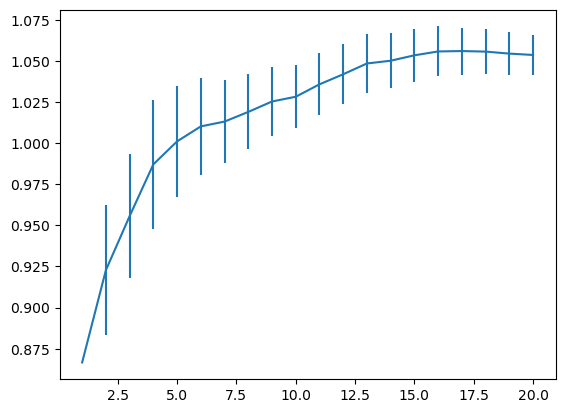

In [3]:
plt.errorbar(df1['BLOCK'],df1['T_AVE'],yerr=df1['ERROR'])
plt.show()

In [4]:
file= "/home/elisa/Scrivania/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/pofv.csv"
with open (file) as f:
    distrib_type = f.readline()
    print(distrib_type)
    bin_size_line = f.readline()
    print (bin_size_line)
    bin_size = float(bin_size_line.split('\t', 1)[1])

INITIAL DISTRIBUTION	DELTA

BIN SIZE	0.413118



In [5]:
df = pd.read_csv(file,sep ="\t", skiprows=2, skip_blank_lines = False)
df.head()

,BIN,VELOCITY,AVE_POFV,ERROR
0,0.0,0.413118,0.013378,0.0
1,1.0,0.826236,0.044594,0.0
2,2.0,1.239350,1.093500,0.0
3,3.0,1.652470,128.825000,0.0
4,4.0,2.065590,41.401600,0.0


# ES 4.1

In [6]:
def Maxwell_Boltzmann (v,T) :
    return 1/np.pow((2* np.pi*T),3/2)*4*np.pi*v*v*np.exp(-v*v/(2*T))
    

T=df1['T_AVE'][19]
print("Equilibrium temperature: " ,T)
# Find the indices where blank lines are (all NaNs)
nan_rows = df[df.isnull().all(axis=1)].index

# Add start/end points for slicing
split_points = [-1] + list(nan_rows) + [len(df)]

# Slice the DataFrame into blocks
histograms = []
for i in range(len(split_points) - 1):
    start = split_points[i] + 1
    end = split_points[i + 1]
    block = df.iloc[start:end].reset_index(drop=True)
    if not block.empty:
        histograms.append(block)


Equilibrium temperature:  1.05363


Velocità non normalizzate

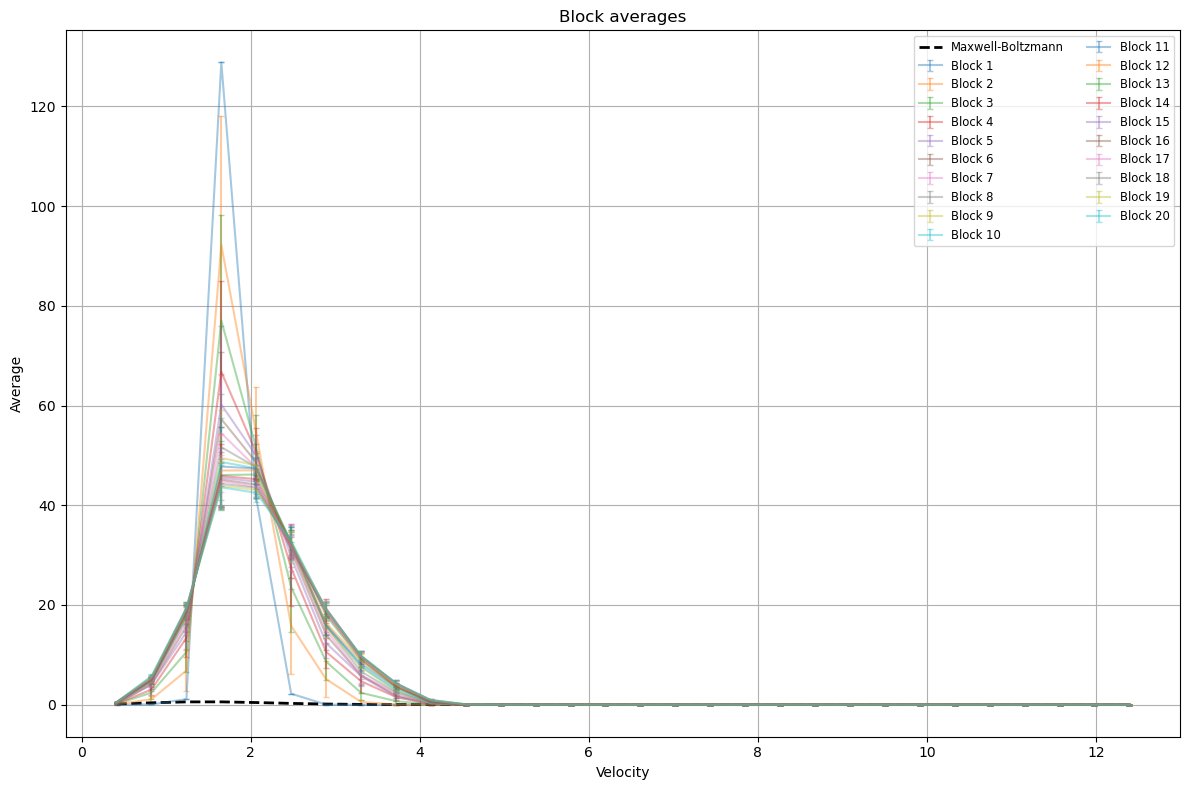

In [7]:

plt.figure(figsize=(12, 8))

for i, h in enumerate(histograms):
    plt.errorbar(
        h['VELOCITY'], h['AVE_POFV'], yerr=h['ERROR'],
        fmt='-', capsize=2, alpha=0.4, label=f'Block {i+1}'
    )
v_vals = histograms[0]['VELOCITY'].values
mb_curve = Maxwell_Boltzmann(v_vals,T)
plt.plot(v_vals, mb_curve, 'k--', label='Maxwell-Boltzmann', linewidth=2)

plt.xlabel('Velocity')
plt.ylabel('Average')
plt.title('Block averages')
plt.grid(True)
plt.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

MAXWELL BOLTZMANN

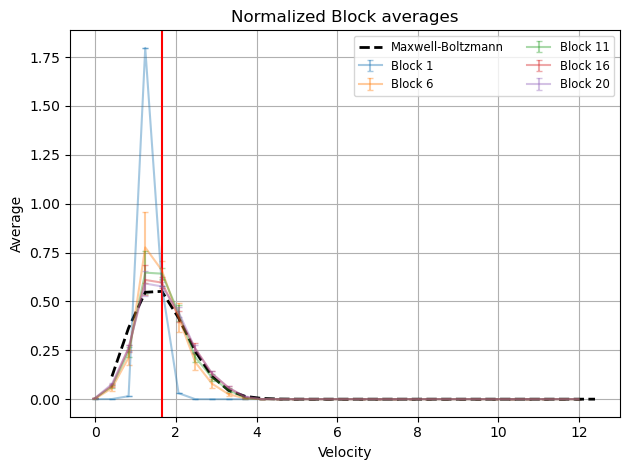

In [14]:
from scipy.integrate import trapezoid

for i, h in enumerate(histograms):
    if i%5==0 or i==19:
        v =  h['VELOCITY'].values-bin_size
        y = h['AVE_POFV'].values
        err = h['ERROR'].values
        
        area = trapezoid(y, v)
        
        if area > 0:
            norm_y = y / area
            norm_err = err / area
        else:
            norm_y = y
            norm_err = err  # leave as-is if area is 0 (shouldn't happen)
        
        plt.errorbar(v, norm_y, yerr=norm_err, fmt='-', alpha=0.4, capsize=2, label=f'Block {i+1}')
            

v_vals = histograms[0]['VELOCITY'].values
mb_curve = Maxwell_Boltzmann(v_vals,T)
y = max(mb_curve)
for i in range(len(mb_curve)):
    if mb_curve[i] == y: 
        vmax= v_vals[i]
        break

plt.plot(v_vals, mb_curve, 'k--', label='Maxwell-Boltzmann', linewidth=2)
plt.axvline(vmax,c ='red', linewidth=1.5)

plt.xlabel('Velocity')
plt.ylabel('Average')
plt.title('Normalized Block averages')
plt.grid(True)
plt.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()